## 1. Import Library

Pada tahap ini dilakukan import dan mengintall library yang akan dibutuhkan

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## 2. Data Loading

Pada tahap ini, akan dilakukan loading dataset yang diambil dari dataset eksternal yang berasal dari kaggle di upload oleh : [Matchi](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install kaggle

In [7]:
!kaggle datasets download -d mathchi/diabetes-data-set

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 28.6MB/s]


In [8]:
!unzip /content/diabetes-data-set.zip -d /content/diabetes

Archive:  /content/diabetes-data-set.zip
  inflating: /content/diabetes/diabetes.csv  


In [9]:
df =  pd.read_csv('/content/diabetes/diabetes.csv')
print(df.shape)
df.head(100)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


Sehingga setelah dilihat untuk dataset yang akan digunakan terdapat 768 baris dan 9 kolom yang akan digunakan untuk memprediksi kemungkinan seseorang positif atau negatif diabetes.

## 3. Exploratory Data Analysis (EDA)

### A. Deskripsi variabel
Meliputi dekripsi variabel apa saja yang ada pada dataset yang dapat digunakan beserta deskripsi fungsi dan penjelasan masing masing variabelnya

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pada dataframe yang telah dijabarkan diatas, terdapat informasi yang akan digunakan yaitu :

| No | Nama Kolom                   | Tipe Data | Deskripsi                                                           |
| -- | ---------------------------- | --------- | ------------------------------------------------------------------- |
| 1  | **Pregnancies**              | `int64`   | Jumlah kehamilan yang pernah dialami pasien                         |
| 2  | **Glucose**                  | `int64`   | Konsentrasi glukosa plasma 2 jam setelah tes toleransi glukosa oral |
| 3  | **BloodPressure**            | `int64`   | Tekanan darah diastolik (dalam mm Hg)                               |
| 4  | **SkinThickness**            | `int64`   | Ketebalan lipatan kulit triceps (dalam mm)                          |
| 5  | **Insulin**                  | `int64`   | Kadar insulin serum 2 jam setelah makan (dalam μU/ml)               |
| 6  | **BMI**                      | `float64` | Indeks Massa Tubuh = berat (kg) / (tinggi (m))²                     |
| 7  | **DiabetesPedigreeFunction** | `float64` | Nilai fungsi silsilah keluarga terhadap risiko diabetes             |
| 8  | **Age**                      | `int64`   | Usia pasien (dalam tahun)                                           |
| 9  | **Outcome**                  | `int64`   | Variabel target (0 = tidak diabetes, 1 = diabetes)                  |


Dari output terlihat bahwa:

- Seluruh kolom pada dataset memiliki tipe numerik (int64 dan float64), sehingga tidak terdapat kolom bertipe object atau fitur kategorikal (non-numerik).

- Terdapat 7 kolom numerik dengan tipe data int64, yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, dan Outcome. Kolom-kolom ini merupakan fitur numerik yang berkaitan dengan riwayat medis dan hasil pengukuran klinis.

- Terdapat 2 kolom numerik dengan tipe data float64, yaitu: BMI dan DiabetesPedigreeFunction. Kolom ini juga merupakan hasil pengukuran dan estimasi terkait kondisi kesehatan pasien.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi `describe()` digunakan untuk menampilkan statistik deskriptif dari setiap kolom numerik dalam dataset. Informasi yang diberikan meliputi:
- `Count`: Jumlah data (non-null) pada setiap kolom.
- `Mean`: Nilai rata-rata dari kolom.
- `Std`: Standar deviasi, mengukur sebaran data terhadap nilai rata-rata.
- `Min`: Nilai minimum dalam kolom.
- `25%`: Kuartil pertama (Q1), yaitu nilai yang memisahkan 25% data terbawah.
- `50%`: Kuartil kedua (Q2) atau median, yaitu nilai tengah dari data.
- `75%`: Kuartil ketiga (Q3), yaitu nilai yang memisahkan 25% data teratas.
- `Max`: Nilai maksimum dalam kolom.

### B. Menangani Missing Value
Meliputi pengecekan missing value pada dataset untuk kemudian ditangani atau dibersihkan

#### Pengecekan missing value

In [12]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Terlihat tidak adanya missing value pada semua variabel yang ada pada dataset tersebut

#### Pengecekan duplikasi data

In [13]:
df.duplicated().sum()

np.int64(0)

Terlihat tidak adanya duplikasi data pada semua variabel yang ada pada dataset tersebut

#### Visualisasi outlier
Menampilkan outlier dari masing masing kolom untuk dibersihkan

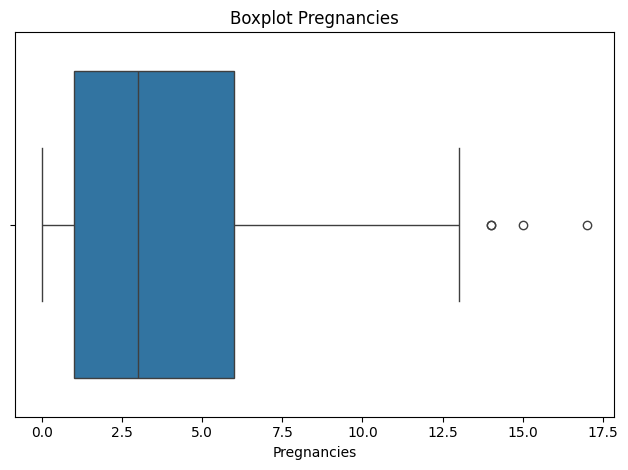

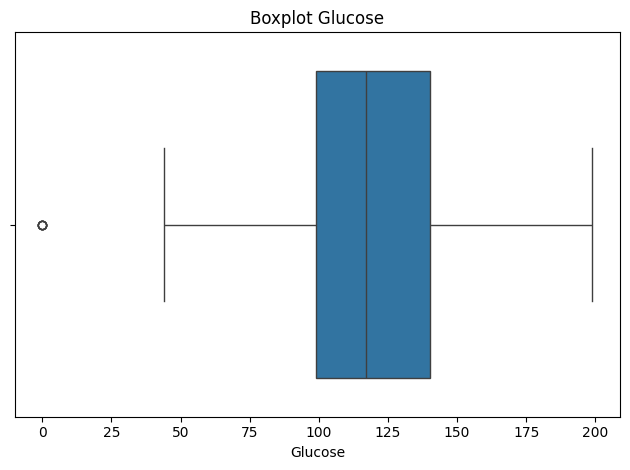

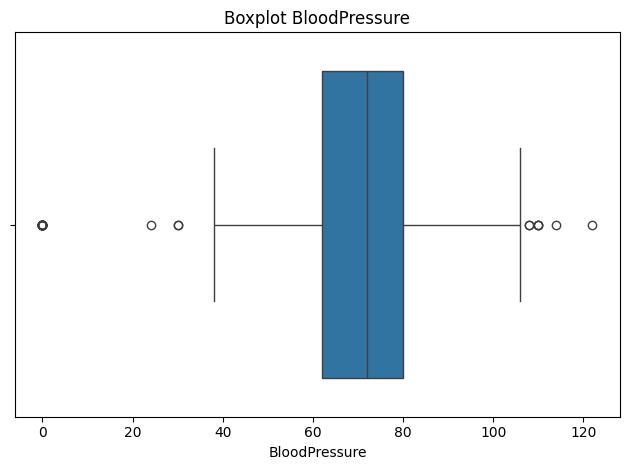

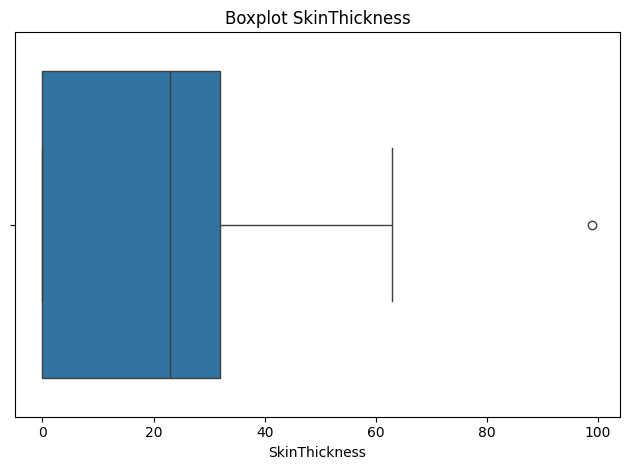

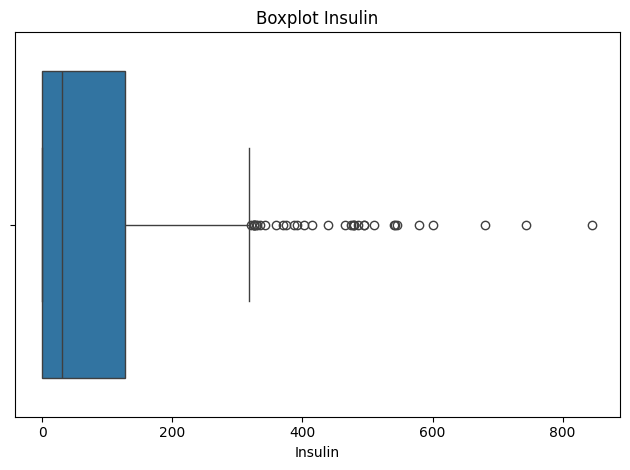

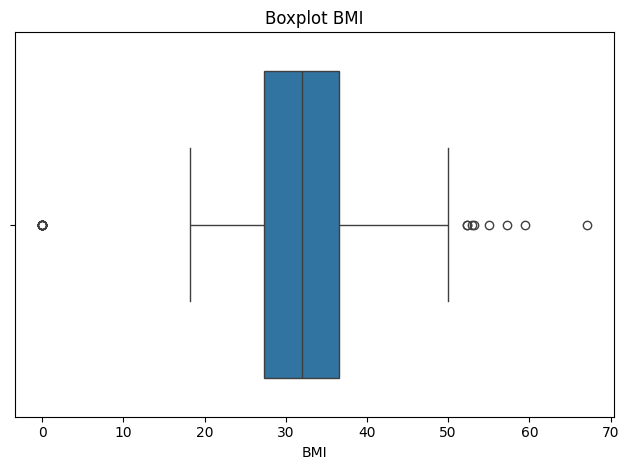

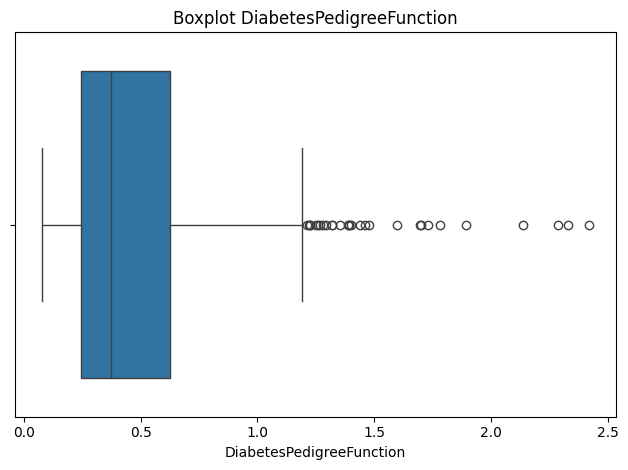

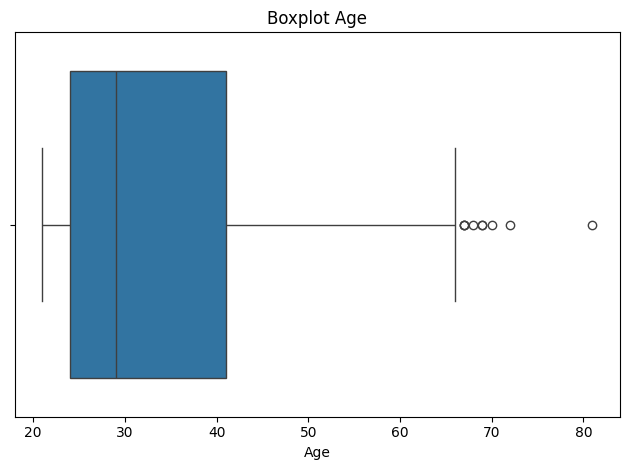

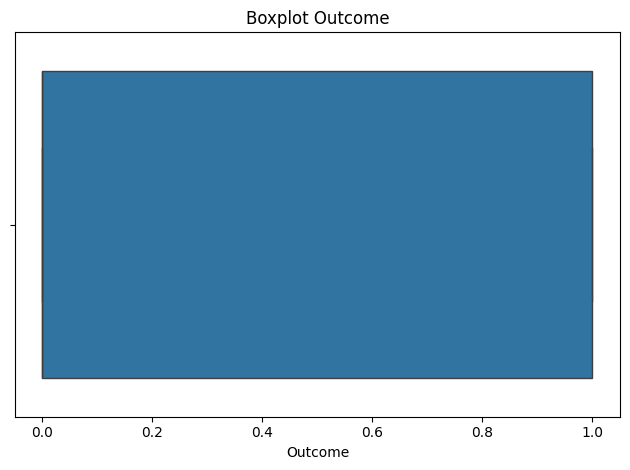

In [14]:
df_outlier = df.select_dtypes(include=['number'])
for column in df_outlier:
    plt.figure()
    sns.boxplot(data=df_outlier, x=column)
    plt.title(f'Boxplot {column}')
    plt.tight_layout()

Boxplot digunakan untuk melihat dan mengidentifikasi outlier dan akan ditangani dengan metode IQR

In [15]:
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[filter_outliers]
df.shape

(639, 9)

Pada tahap ini, dilakukan proses deteksi dan penghapusan outlier dari dataset. Pertama, diambil hanya kolom-kolom yang bertipe numerik agar proses deteksi outlier lebih akurat. Kemudian, dihitung nilai kuartil pertama (Q1), kuartil ketiga (Q3), dan selisih antar kuartil (IQR) untuk setiap kolom numerikal. Berdasarkan metode IQR, baris-baris yang memiliki nilai lebih kecil dari Q1 - 1.5 × IQR atau lebih besar dari Q3 + 1.5 × IQR dianggap sebagai outlier. Filter kemudian diterapkan untuk menyaring hanya baris-baris tanpa outlier, dan dataset diperbarui agar hanya memuat data yang bersih

Sehingga hasilnya dataset yang digunakan setelah dibersihkan tersisa 639 baris dan 9 kolom

### C. Univariate Analysis
Menampilkan persebaran data numerikal

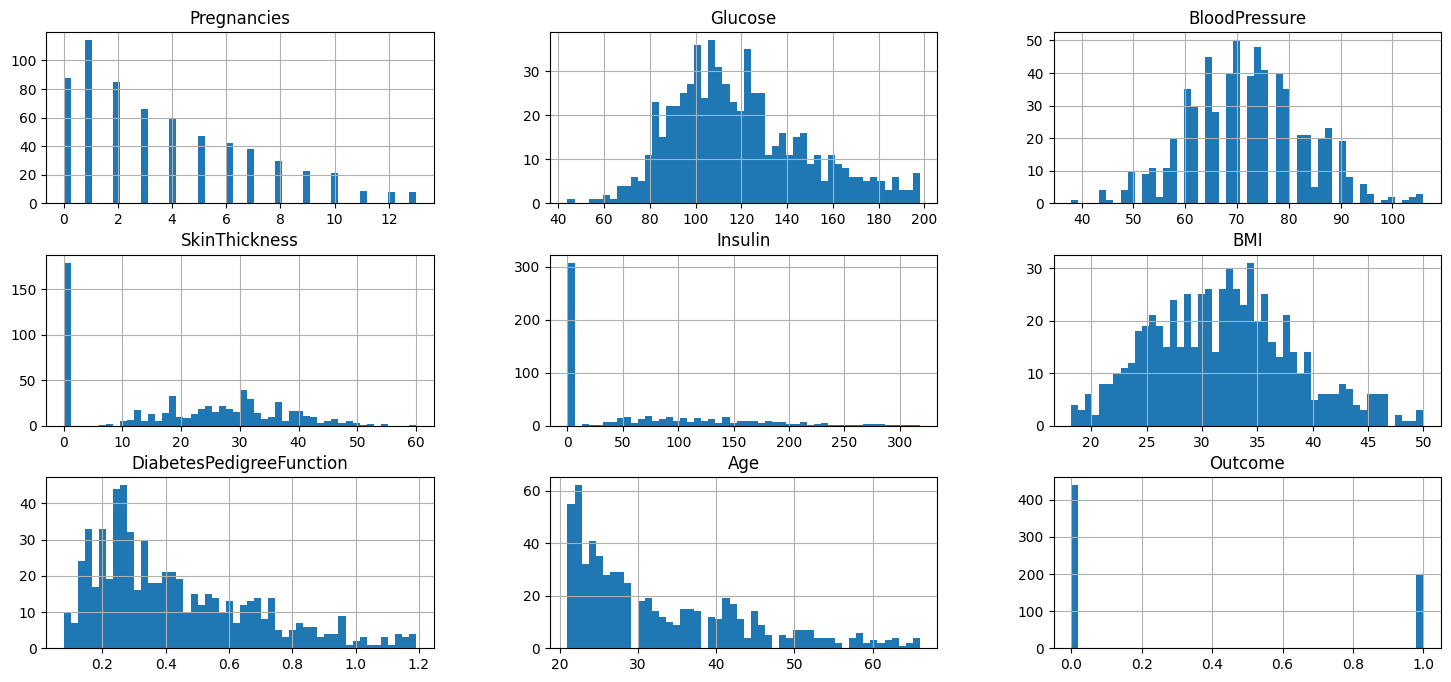

In [16]:
df.hist(bins=50, figsize=(18,8))
plt.show()

### D. Multivariate analysis
Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

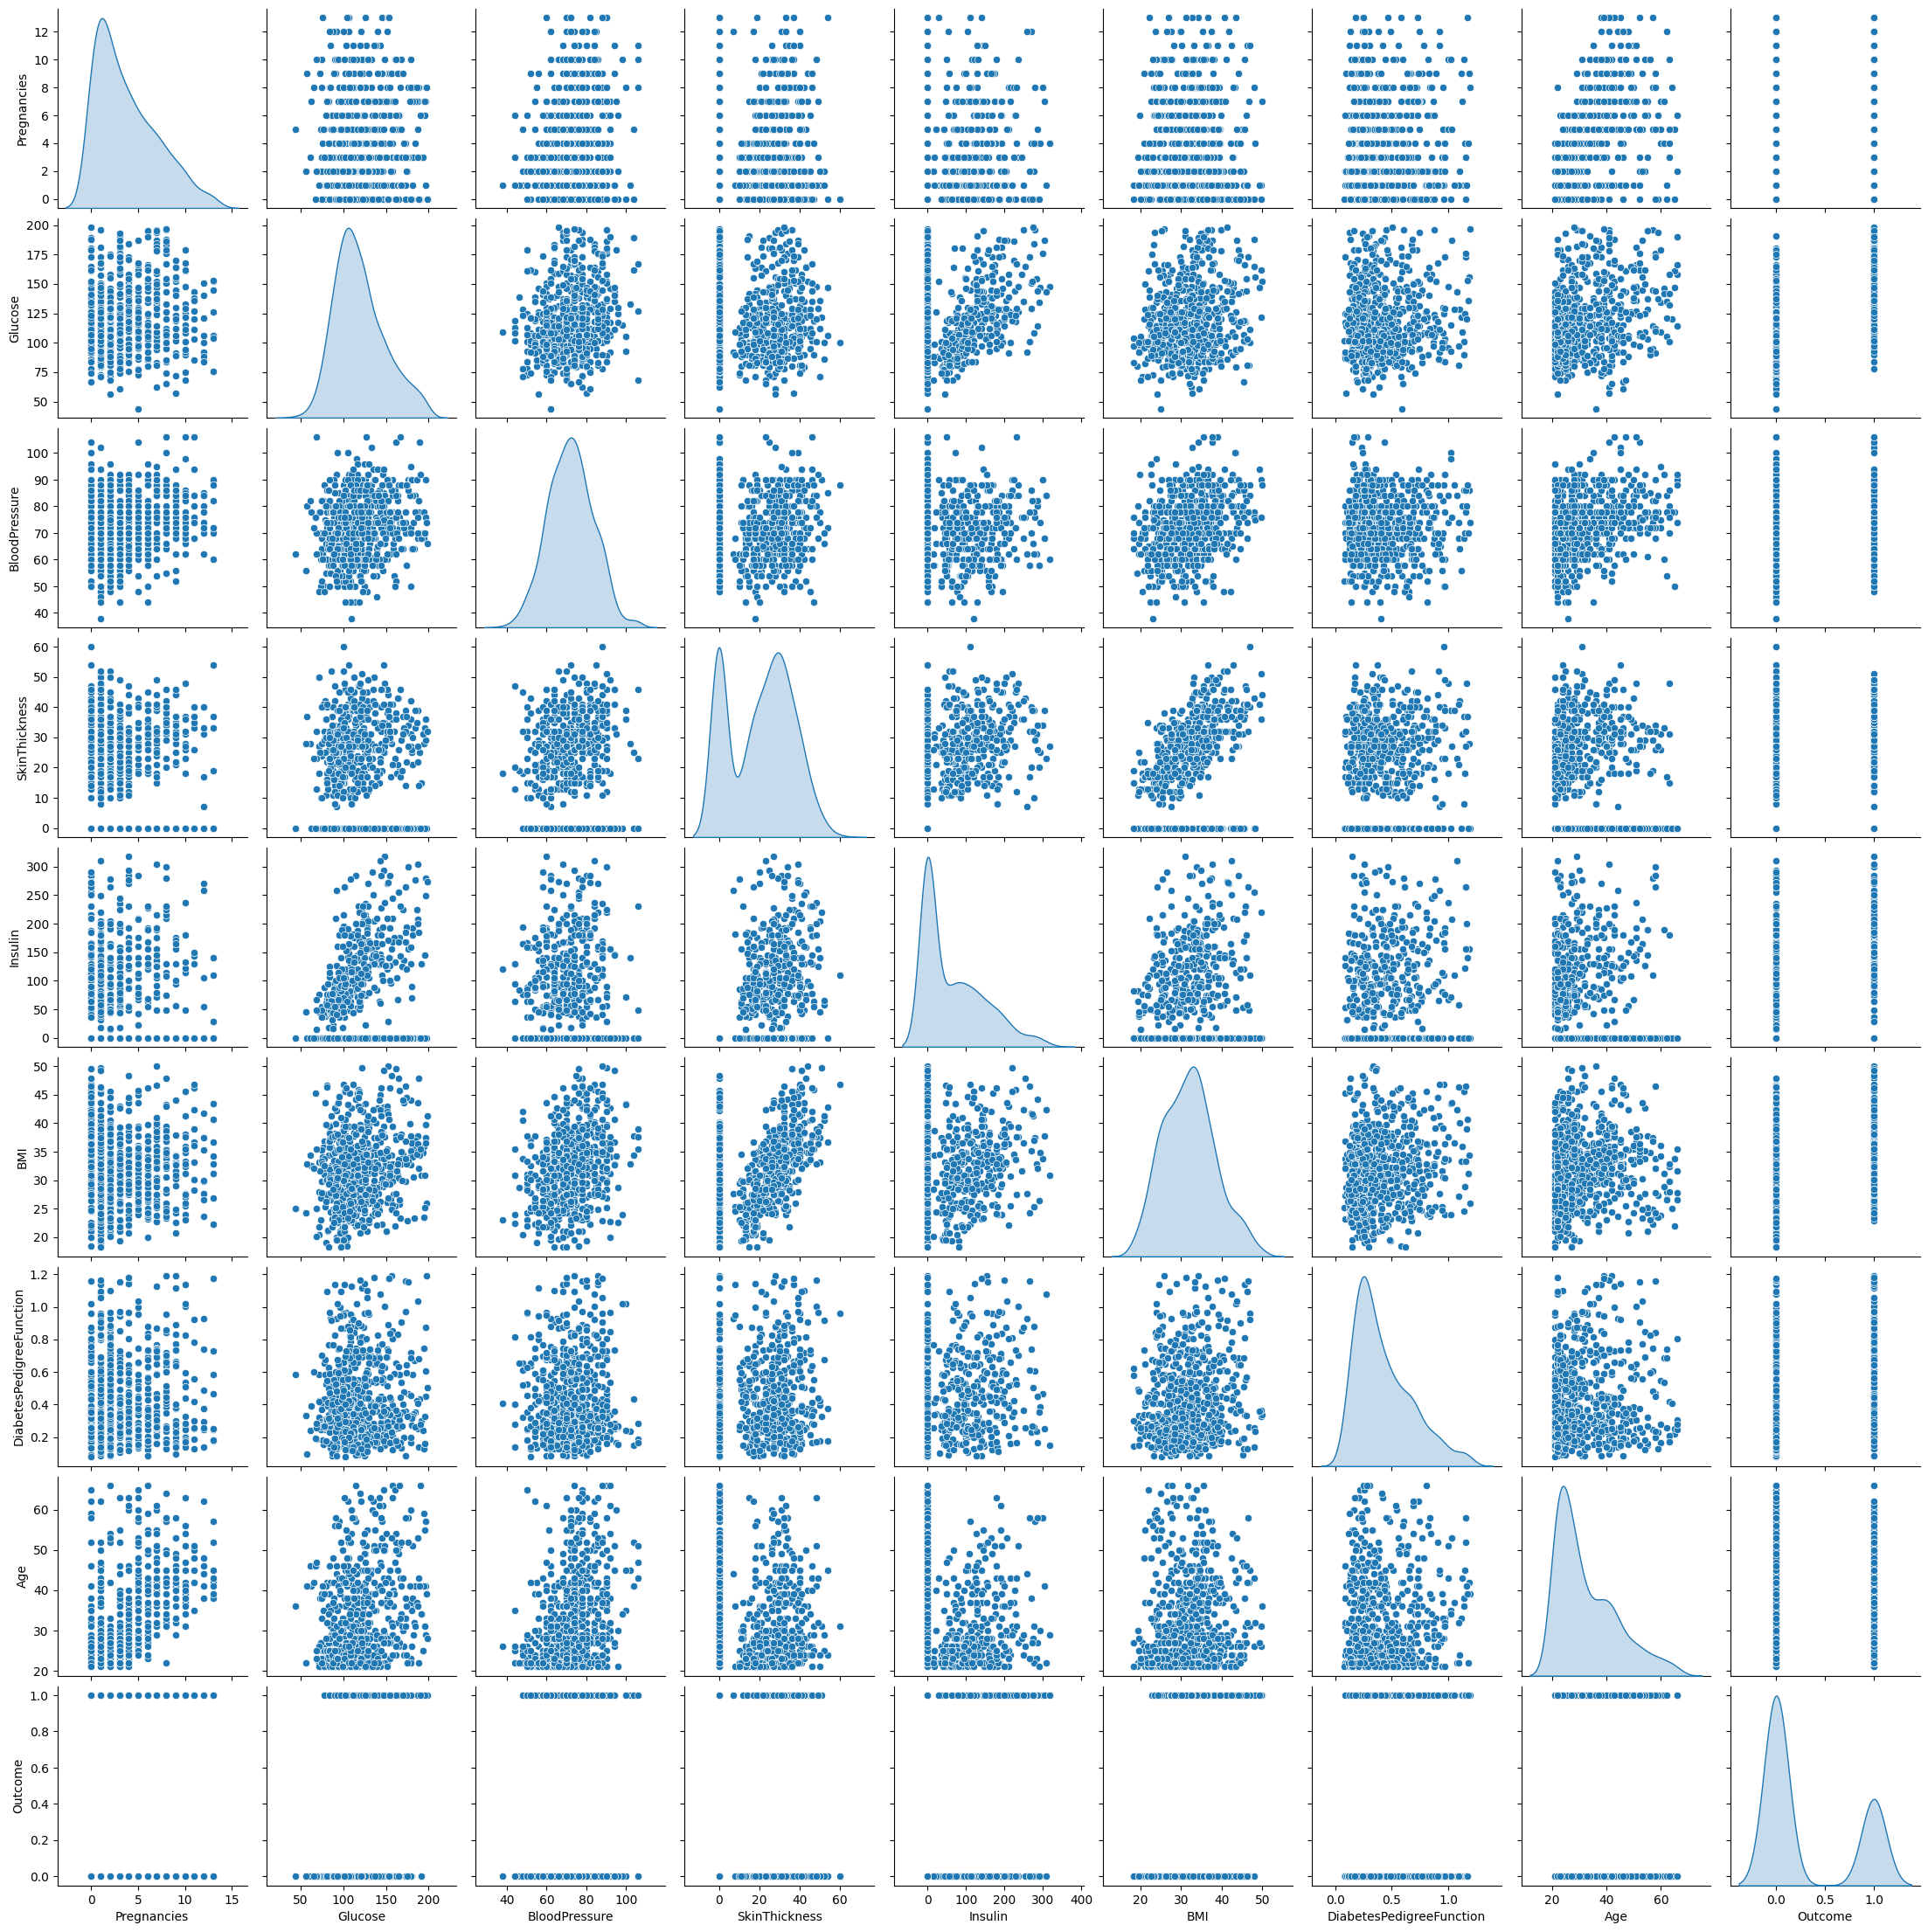

In [17]:
sns.pairplot(df, diag_kind = 'kde')

Melihat korelasi antar fitur dengan matrix korelasi

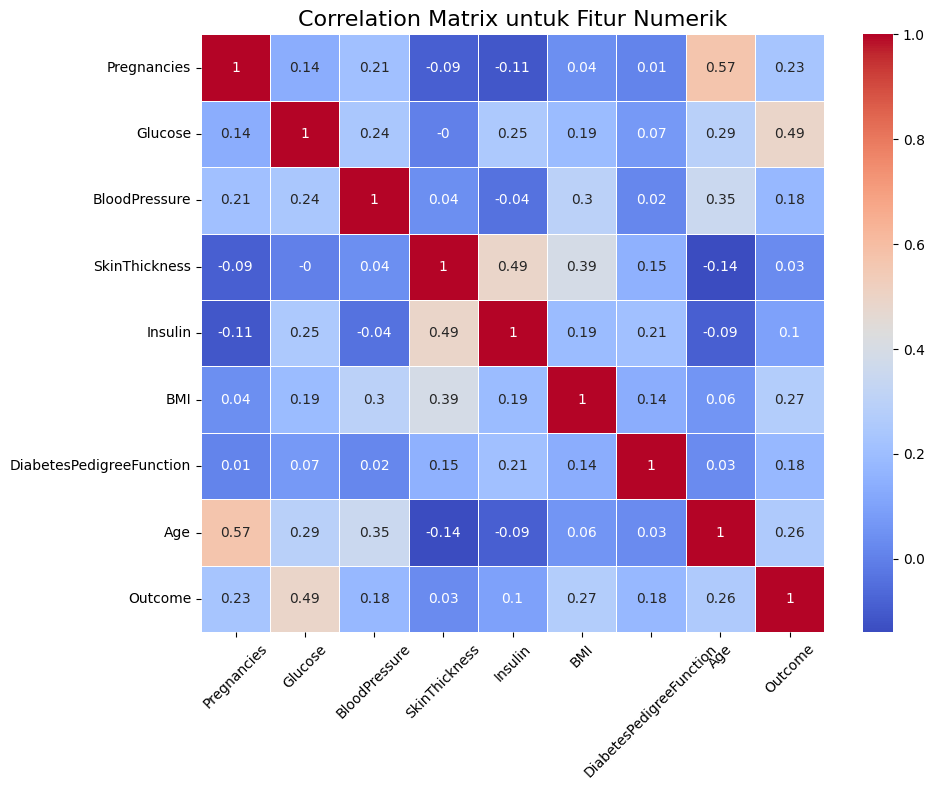

In [18]:
feature = df.select_dtypes(include='number').columns
correlation_matrix = df[feature].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preparation
Merupakan tahap pembersihan data sebelum modeling

#### A. PCA
Dipilih beberapa fitur yang paling relevan yang akan digunakan

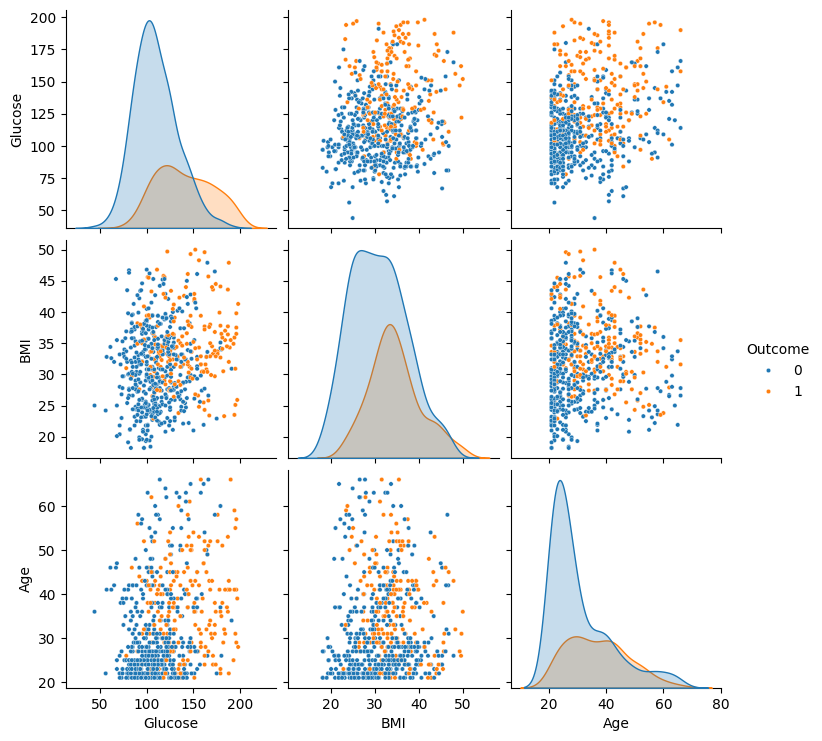

In [19]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', plot_kws={"s": 10})

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(df[['Glucose', 'BMI', 'Age', 'Outcome']])
princ_comp = pca.transform(df[['Glucose', 'BMI', 'Age', 'Outcome']])

#### B. Split Dataset
Memisahkan dataset antara fitur x dan y dan membagi menjadi data train dan dataset (90% train, 10% test)

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print(f'Total dataet train : {len(X_train)}')
print(f'Total dataset test : {len(X_test)}')

Total dataet train : 575
Total dataset test : 64


#### C. Standarisasi
Standarisasi menggunakan standartcaler dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.

In [ ]:
feature = ['Glucose', 'BMI', 'Age']

scaler = StandardScaler()
scaler.fit(X_train[feature])
X_train[feature] = scaler.transform(X_train[feature])
X_train[feature].head()

,Glucose,BMI,Age
559,-1.171741,-0.301593,0.210472
700,0.114906,0.586463,-0.596936
353,-0.997870,-0.745620,-0.776360
646,1.679748,-1.327450,0.031048
307,0.636520,-1.113092,-1.045496


In [ ]:
X_train[feature].describe().round(4)

,Glucose,BMI,Age
count,575.0000,575.0000,575.0000
mean,-0.0000,0.0000,0.0000
std,1.0009,1.0009,1.0009
min,-2.5975,-2.1236,-1.0455
25%,-0.6849,-0.7227,-0.7764
50%,-0.1981,-0.0107,-0.3278
75%,0.6017,0.6477,0.6590
max,2.7577,2.7454,2.9915


## Model Development
Pada tahap ini akan digunakan untuk mengembangkan model machine learning beberapa algoritma dan akan dipilih yang terbaik. Dataframe akan disiapkan terlebih dahulu untuk melakukan analisis ketiga model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

#### KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik. Pada tahap ini kita hanya melatih data training dan menyimpan data testing

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Beberapa parameter yang digunakan :
- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

#### Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Beberapa parameter-parameter yang digunakan pada potongan kode di atas :
- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

## Model Evaluation
Menggunakan MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi untuk mengevaluasi model. Namun, sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji

In [ ]:
X_test.loc[:, feature] = scaler.transform(X_test[feature])

Selanjutnya model dievaluasi dengan MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
KNN,0.000169,0.000205
RF,0.000023,0.000303
Boosting,0.000122,0.000237


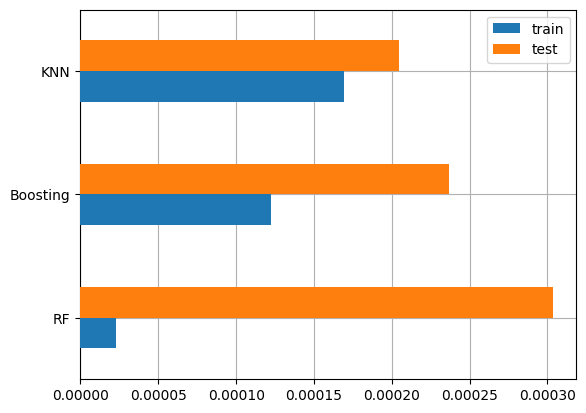

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

MSE mengukur rata-rata kuadrat dari selisih antara nilai prediksi dan nilai aktual. Semakin kecil, semakin baik performa model. KNN memiliki performa terbaik dengan MSE terkecil, menunjukkan hasil prediksi yang paling akurat dan perbedaan kecil antara nilai MSE di data train dan test menandakan model tidak overfitting. Random forest dan Boosting masih layak dipertimbangkan, namun akurasinya lebih rendah dari KNN.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
72,1,0.6,0.5,0.5


Tabel di atas memperlihatkan perbandingan antara label sebenarnya (`y_true`) dan hasil prediksi dari tiga model klasifikasi yang digunakan: K-Nearest Neighbors (`prediksi_KNN`), Random Forest (`prediksi_RF`), dan Boosting (`prediksi_Boosting`). Pada baris yang ditampilkan, nilai aktual (`y_true`) adalah 1.
